<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ex_clustering" data-toc-modified-id="Ex_clustering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ex_clustering</a></span><ul class="toc-item"><li><span><a href="#0---Preprocessing-(imports,-cleaning,-ordering)" data-toc-modified-id="0---Preprocessing-(imports,-cleaning,-ordering)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>0 - Preprocessing (imports, cleaning, ordering)</a></span></li><li><span><a href="#2---Clustering" data-toc-modified-id="2---Clustering-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2 - Clustering</a></span></li></ul></li></ul></div>

# Ex_clustering

## 0 - Preprocessing (imports, cleaning, ordering)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df_raw = pd.read_csv("European+elections_November.csv")

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [5]:
df_raw.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q_RelevantIDDuplicate',
       'Q_RelevantIDDuplicateScore', 'Q_RelevantIDFraudScore',
       'Q_RelevantIDLastStartDate', 'Q13', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9',
       'Q6_10', 'Q6_11', 'Q6_12', 'Q6_13', 'Q6_14', 'Q6_15', 'Q6_16', 'Q6_17',
       'Q6_18', 'Q6_19', 'Q6_20', 'Q6_21', 'Q6_22', 'Q6_23', 'Q6_24', 'Q7_1',
       'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q20',
       'Q8_1', 'Q9_1', 'Q10_1', 'Q11_1', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
       'Q12_5', 'Q12_6', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q21',
       'Q22', 'Q23', 'Q24', 'opp', 'V', 'isNew', 'r

In [6]:
to_drop = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q_RelevantIDDuplicate',
       'Q_RelevantIDDuplicateScore', 'Q_RelevantIDFraudScore', 'isNew', 'rid', 
       'Q_TotalDuration', 'psid', 'pid', 'basic', 'gid',
       'sname', 'enc', 'gc', 'opp', 'V', 'term']

In [7]:
dfr = df_raw.drop(to_drop, axis=1)

In [8]:
display_all(dfr)

,Q_RelevantIDLastStartDate,Q13,Q1,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q6_13,Q6_14,Q6_15,Q6_16,Q6_17,Q6_18,Q6_19,Q6_20,Q6_21,Q6_22,Q6_23,Q6_24,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q20,Q8_1,Q9_1,Q10_1,Q11_1,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q23,Q24,age
0,Q_RelevantIDLastStartDate,Ci teniamo alla qualità dei nostri dati. Affin...,Sesso,Quanti anni hai? (numero),Nel comune in cui vivi abitano,Quale di questi approssima meglio il reddito l...,In che regione vivi?,"Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...","Le seguenti frasi descrivono una persona, indi...",Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Per ognuno di questi media indica quanto lo us...,Quando scegli che partito votare quali sono i ...,Seleziona nella scala dove ti senti rispetto a...,Seleziona nella scala dove ti senti rispetto a...,Seleziona nella scala dove ti senti rispetto a...,Seleziona nella scala dove ti senti rispetto a...,In una scala da 1 (per nulla) a 7 (molto) quan...,In una scala da 1 (per nulla) a 7 (molto) quan...,In una scala da 1 (per nulla) a 7 (molto) quan...,In una scala da 1 (per nulla) a 7 (molto) quan...,In una scala da 1 (per nulla) a 7 (molto) quan...,In una scala da 1 (per nulla) a 7 (molto) quan...,Considerando le tue idee politiche ti definire...,Che coalizione/partito hai votato alle Elezion...,Per quale partito hai votato alle Elezioni Eur...,Per quale partito hai votato alle Elezioni Pol...,Per quale partito hai intenzione di votare all...,Per quale partito voteresti alle prossime Elez...,Al momento sei?,In che luogo sei cresciuto?,Qual è il titolo di studio più alto che hai co...,Che lavoro fai?,age
1,"{""ImportId"":""Q_RelevantIDLastStartDate"",""timeZ...","{""ImportId"":""QID20""}","{""ImportId"":""QID1""}","{""ImportId"":""QID2_TEXT""}","{""ImportId"":""QID18""}","{""ImportId"":""QID6""}","{""ImportId"":""QID19""}","{""ImportId"":""QID35_1""}","{""ImportId"":""QID35_2""}","{""ImportId"":""QID35_3""}","{""ImportId"":""QID35_4""}","{""ImportId"":""QID35_5""}","{""ImportId"":""QID35_6""}","{""ImportId"":""QID35_7""}","{""ImportId"":""QID35_8""}","{""ImportId"":""QID35_9""}","{""ImportId"":""QID35_10""}","{""ImportId"":""QID35_11""}","{""ImportId"":""QID35_12""}","{""ImportId"":""QID35_13""}","{""ImportId"":""QID35_14""}","{""ImportId"":""QID35_15""}","{""ImportId"":""QID35_16""}","{""ImportId"":""QID35_17""}","{""ImportId"":""QID35_18""}","{""ImportId"":""QID35_19""}","{""Import

In [9]:
dfr.drop('Q_RelevantIDLastStartDate', axis=1, inplace=True)

In [10]:
domande = dict(dfr.iloc[0])

In [11]:
dfr.drop([0,1], axis=0, inplace=True)

In [12]:
domande

{'Q13': 'Ci teniamo alla qualità dei nostri dati. Affinché ci sia possibile capire al meglio come si correlano le opinioni è importante che pensi bene prima di dare la tua risposta migliore a ogni domanda di questo questionario. Ti impegnerai a rispondere a ogni domanda nel modo migliore possibile?',
 'Q1': 'Sesso',
 'Q2': 'Quanti anni hai? (numero)',
 'Q3': 'Nel comune in cui vivi abitano',
 'Q4': 'Quale di questi approssima meglio il reddito lordo annuo totale del tuo nucleo familiare?',
 'Q5': 'In che regione vivi?',
 'Q6_1': 'Le seguenti frasi descrivono una persona, indica in una scala da 1 a 6 quanto è simile a te la persona descritta - Generalmente ha molta fiducia in se stesso ed è soddisfatto della sua vita, pensa di avere molto di cui essere fiero',
 'Q6_2': 'Le seguenti frasi descrivono una persona, indica in una scala da 1 a 6 quanto è simile a te la persona descritta - È importante per lui che ogni persona sia trattata allo stesso modo, giustizia per tutti anche chi non co

In [14]:
dfr.shape[1]

61

In [15]:
dfr.dropna(inplace=True)

In [16]:
domande

{'Q13': 'Ci teniamo alla qualità dei nostri dati. Affinché ci sia possibile capire al meglio come si correlano le opinioni è importante che pensi bene prima di dare la tua risposta migliore a ogni domanda di questo questionario. Ti impegnerai a rispondere a ogni domanda nel modo migliore possibile?',
 'Q1': 'Sesso',
 'Q2': 'Quanti anni hai? (numero)',
 'Q3': 'Nel comune in cui vivi abitano',
 'Q4': 'Quale di questi approssima meglio il reddito lordo annuo totale del tuo nucleo familiare?',
 'Q5': 'In che regione vivi?',
 'Q6_1': 'Le seguenti frasi descrivono una persona, indica in una scala da 1 a 6 quanto è simile a te la persona descritta - Generalmente ha molta fiducia in se stesso ed è soddisfatto della sua vita, pensa di avere molto di cui essere fiero',
 'Q6_2': 'Le seguenti frasi descrivono una persona, indica in una scala da 1 a 6 quanto è simile a te la persona descritta - È importante per lui che ogni persona sia trattata allo stesso modo, giustizia per tutti anche chi non co

In [17]:
spec = dfr[['Q8_1', 'Q9_1', 'Q10_1', 'Q11_1']]
spec

,Q8_1,Q9_1,Q10_1,Q11_1
2,1,2,2,3
3,21,-13,-23,-34
4,29,-25,-22,-41
5,22,31,-50,50
6,10,-41,-32,-26
...,...,...,...,...
1161,42,21,41,31
1162,11,32,42,40
1163,-14,-22,-10,-11
1164,1,1,14,1


In [18]:
spec.rename(columns = {'Q8_1': 'Liberismo',
                       'Q9_1': 'Nazionalismo',
                       'Q10_1': 'Progressismo',
                       'Q11_1': 'Autoritarismo'}, inplace=True)

C:\Users\Cris_\anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [19]:
spec

,Liberismo,Nazionalismo,Progressismo,Autoritarismo
2,1,2,2,3
3,21,-13,-23,-34
4,29,-25,-22,-41
5,22,31,-50,50
6,10,-41,-32,-26
...,...,...,...,...
1161,42,21,41,31
1162,11,32,42,40
1163,-14,-22,-10,-11
1164,1,1,14,1


In [20]:
spec = dfr[['Q8_1', 'Q9_1', 'Q10_1', 'Q11_1']].astype('float')
spec.columns = ['Liberism','Sovranism','Conservatorism','Authoritarianism']

In [21]:
spec.corr().style.background_gradient()

,Liberism,Sovranism,Conservatorism,Authoritarianism
Liberism,1.000000,0.366846,0.390487,0.273912
Sovranism,0.366846,1.000000,0.567082,0.383832
Conservatorism,0.390487,0.567082,1.000000,0.379299
Authoritarianism,0.273912,0.383832,0.379299,1.000000


## 2 - Clustering

In [22]:
from hdbscan import HDBSCAN

In [ ]:
"""
Iperparametri HDBSCAN:

- Min_cluster_size = : con questo parametro ho impostato il numero 
minimo di persone da inserire all’interno di un cluster, ovvero la sua 
dimensione minima

- Metric = ‘euclidean’: con questo parametro ho scelto la metrica da 
utilizzare durante il calcolo della distanza tra le istanze in una serie di 
elementi, nel nostro caso è la distanza euclidea

- Cluster_selection_method = ‘leaf’: HDBSCAN supporta un parametro 
aggiuntivo cluster_selection_method per determinare come selezionare i 
cluster dalla gerarchia dell'albero dei cluster. Nel mio caso ho scelto i nodi 
foglia dall'albero.

- Min_samples = 1: con questo parametro ho scelto il numero di campioni in 
un ‘vicinato’ affinché un punto sia considerato un punto centrale

"""

In [25]:
clu1.labels_

array([ 3, -1, -1, ...,  1, -1,  3], dtype=int64)

In [27]:
dfr['cluster'] = clu1.labels_

In [34]:
dfr['cluster'] = dfr['cluster'].astype(int)

In [37]:
dfr['cluster'].value_counts()

-1    813
 3    110
 0    109
 1     37
 2     31
Name: cluster, dtype: int64

In [40]:
dfr[dfr['cluster'] == 2]

,Q13,Q1,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,...,Q16,Q17,Q18,Q19,Q21,Q22,Q23,Q24,age,cluster
8,Darò risposte più precise possibile,Maschio,22,Meno di 2.000 persone,Fino a 20.000 euro,Calabria,4 - leggermente simile,5 - simile,3 - leggermente diversa,4 - leggermente simile,...,Movimento 5 Stelle,Forza Italia,Movimento 5 Stelle,Fratelli d'Italia,Nubile/Celibe,Area rurale,Laurea triennale o equivalente,Sono uno/a studente,18-24,2
11,Darò risposte più precise possibile,Femmina,25,Piu' di 1 milione persone,Oltre 300.000 euro,Piemonte,6 - molto simile,6 - molto simile,6 - molto simile,6 - molto simile,...,Movimento 5 Stelle,Partito Democratico,Forza Italia,Fratelli d'Italia,Sposata/o o convivi,Grande città (500.000+ abitanti),Dottorato di ricerca,Lavoro come dirigente,25-34,2
41,Darò risposte più precise possibile,Maschio,75,Tra 10-49.999 persone,Da 60-79.999 euro,Lombardia,4 - leggermente simile,4 - leggermente simile,4 - leggermente simile,4 - leggermente simile,...,L'altra Europa con Tsipras,+Europa,+Europa,+Europa,Sposata/o o convivi,Piccola città,Licenza media,Sono in pensione,65+,2
44,Darò risposte più precise possibile,Maschio,27,Piu' di 1 milione persone,Da 80-99.999 euro,Lombardia,5 - simile,4 - leggermente simile,6 - molto simile,5 - simile,...,Forza Italia,Lega,Forza Italia,Forza Italia,Sposata/o o convivi,Grande città (500.000+ abitanti),Laurea magistrale o equivalente,Lavoro come dirigente,25-34,2
78,Darò risposte più precise possibile,Maschio,73,Tra 100-499.999 persone,Fino a 20.000 euro,Toscana,6 - molto simile,6 - molto simile,6 - molto simile,6 - molto simile,...,Lega Nord,Fratelli d'Italia,Fratelli d'Italia,Lega,Sposata/o o convivi,Piccola città,Diploma di scuola superiore o equivalente,Sono in pensione,65+,2
87,Darò risposte più precise possibile,Maschio,68,Tra 10-49.999 persone,Da 40-59.999 euro,Toscana,4 - leggermente simile,6 - molto simile,5 - simile,5 - simile,...,Lega Nord,Lega,Lega,Fratelli d'Italia,Vedova/o,Piccola città,Diploma di scuola superiore o equivalente,Sono in pensione,65+,2
157,Darò risposte più precise possibile,Femmina,22,Tra 2.000-4999 persone,Da 20-39.999 euro,Lazio,6 - molto simile,6 - molto simile,6 - molto simile,6 - molto simile,...,Partito Democratico,Movimento 5 Stelle,Movimento 5 Stelle,Partito Democratico,Nubile/Celibe,Piccola città,Laurea triennale o equivalente,Sono uno/a studente,18-24,2
212,Darò risposte più precise possibile,Femmina,22,Tra 100-499.999 persone,Da 20-39.999 euro,Lombardia,3 - leggermente diversa,3 - leggermente diversa,4 - leggermente simile,4 - leggermente simile,...,Forza Italia,Forza Italia,Forza Italia,Forza Italia,Sposata/o o convivi,Grande città (500.000+ abitanti),Diploma di scuola superiore o equivalente,Lavoro come dipendente,18-24,2
213,Darò risposte più precise possibile,Maschio,75,Tra 10-49.999 persone,Da 40-59.999 euro,Trentino Alto Adige,4 - leggermente simile,4 - leggermente simile,5 - simile,5 - simile,...,Forza Italia,Forza Italia,Forza Italia,Forza Italia,Sposata/o o convivi,Grande città (500.000+ abitanti),Licenza media,Sono in pensione,65+,2
302,Darò risposte più precise possibile,Femmina,77,Piu' di 1 milione persone,Fino a 20.000 euro,Lazio,4 - leggermente simile,4 - leggermente simile,3 - leggermente diversa,4 - leggermente simile,...,Forza Italia,Fratelli d'Italia,Fratelli d'Italia,Fratelli d'Italia,Vedova/o,Grande città (500.000+ abitanti),Diploma di scuola superiore o equivalente,Sono in pensione,65+,2


In [29]:
dfr.head(20)

,Q13,Q1,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,...,Q16,Q17,Q18,Q19,Q21,Q22,Q23,Q24,age,cluster
2,Darò risposte più precise possibile,Femmina,21,Tra 2.000-4999 persone,Fino a 20.000 euro,Toscana,6 - molto simile,4 - leggermente simile,5 - simile,5 - simile,...,Non ho votato,Non ho votato,Non ho intenzione di votare,Non andrei a votare,Nubile/Celibe,Area rurale,Diploma di scuola superiore o equivalente,Sono uno/a studente,18-24,3
3,Darò risposte più precise possibile,Maschio,24,Tra 10-49.999 persone,Da 20-39.999 euro,Puglia,5 - simile,6 - molto simile,6 - molto simile,6 - molto simile,...,Movimento 5 Stelle,Movimento 5 Stelle,Movimento 5 Stelle,Movimento 5 Stelle,Nubile/Celibe,Piccola città,Laurea magistrale o equivalente,Sono uno/a studente,18-24,-1
4,Darò risposte più precise possibile,Femmina,47,Meno di 2.000 persone,Da 20-39.999 euro,Lombardia,6 - molto simile,6 - molto simile,5 - simile,6 - molto simile,...,Forza Italia,Lega,Lega,Forza Italia,Sposata/o o convivi,Area rurale,Diploma di scuola superiore o equivalente,Lavoro come dipendente,35-49,-1
5,Darò risposte più precise possibile,Femmina,39,Tra 10-49.999 persone,Da 20-39.999 euro,Emilia Romagna,1 - molto diversa,3 - leggermente diversa,4 - leggermente simile,1 - molto diversa,...,Non ho votato,Non ho votato,Non ho ancora deciso chi votare,Non ho ancora deciso chi votare,Sposata/o o convivi,Area rurale,Laurea magistrale o equivalente,Lavoro come dipendente,35-49,-1
6,Darò risposte più precise possibile,Maschio,43,Tra 500-999.999 persone,Fino a 20.000 euro,Campania,4 - leggermente simile,5 - simile,5 - simile,4 - leggermente simile,...,Non ho votato,Movimento 5 Stelle,Movimento 5 Stelle,Non andrei a votare,Nubile/Celibe,Grande città (500.000+ abitanti),Diploma di scuola superiore o equivalente,Mi prendo cura di casa e famiglia,35-49,-1
7,Darò risposte più precise possibile,Maschio,22,Tra 100-499.999 persone,Da 40-59.999 euro,Toscana,5 - simile,5 - simile,6 - molto simile,3 - leggermente diversa,...,Non ho votato,Altro,Forza Italia,Non ho ancora deciso chi votare,Nubile/Celibe,Piccola città,Diploma di scuola superiore o equivalente,Sono uno/a studente,18-24,-1
8,Darò risposte più precise possibile,Maschio,22,Meno di 2.000 persone,Fino a 20.000 euro,Calabria,4 - leggermente simile,5 - simile,3 - leggermente diversa,4 - leggermente simile,...,Movimento 5 Stelle,Forza Italia,Movimento 5 Stelle,Fratelli d'Italia,Nubile/Celibe,Area rurale,Laurea triennale o equivalente,Sono uno/a studente,18-24,2
9,Darò risposte più precise possibile,Maschio,61,Piu' di 1 milione persone,Da 20-39.999 euro,Lazio,5 - simile,6 - molto simile,5 - simile,6 - molto simile,...,Lega Nord,Fratelli d'Italia,Fratelli d'Italia,Fratelli d'Italia,Sposata/o o convivi,Grande città (500.000+ abitanti),Dottorato di ricerca,Sono in pensione,50-64,-1
10,Darò risposte più precise possibile,Femmina,52,Piu' di 1 milione persone,Da 20-39.999 euro,Lazio,4 - leggermente simile,6 - molto simile,5 - simile,6 - molto simile,...,Forza Italia,Movimento 5 Stelle,Movimento 5 Stelle,Non ho ancora deciso chi votare,Nubile/Celibe,Grande città (500.000+ abitanti),Diploma di scuola superiore o equivalente,Sto cercando un lavoro,50-64,-1
11,Darò risposte più precise possibile,Femmina,25,Piu' di 1 milione persone,Oltre 300.000 euro,Piemonte,6 - molto simile,6 - molto simile,6 - molto simile,6 - molto simile,...,Movimento 5 Stelle,Partito Democratico,Forza Italia,Fratelli d'Italia,Sposata/o o convivi,Grande città (500.000+ abitanti),Dottorato di ricerca,Lavoro come dirigente,25-34,2


In [24]:
%%time
clu1 = HDBSCAN(min_cluster_size=30, metric='euclidean', cluster_selection_method='leaf', min_samples=1)
clu1.fit(spec)
pd.DataFrame(clu1.labels_).iloc[:, 0].value_counts()

Wall time: 103 ms


-1    813
 3    110
 0    109
 1     37
 2     31
Name: 0, dtype: int64

In [41]:
wc = []
yk = clu1.fit_predict(spec)

for i in range(4):
    wc.append(yk==i)

In [42]:
spec[wc[0]]

,Liberism,Sovranism,Conservatorism,Authoritarianism
15,-20.0,-22.0,-33.0,-11.0
25,-42.0,-50.0,-50.0,-50.0
33,10.0,-50.0,-50.0,-12.0
38,-32.0,-37.0,-38.0,2.0
45,-25.0,-24.0,-40.0,-26.0
...,...,...,...,...
1064,-20.0,-19.0,-23.0,-20.0
1067,-50.0,-50.0,-50.0,-50.0
1137,-40.0,-50.0,-44.0,-50.0
1146,-20.0,-9.0,-40.0,-18.0


In [43]:
spec[wc[1]]

,Liberism,Sovranism,Conservatorism,Authoritarianism
51,14.0,-16.0,-16.0,-8.0
93,19.0,-20.0,-17.0,-1.0
111,9.0,-11.0,-9.0,0.0
113,20.0,-9.0,-10.0,-10.0
127,11.0,-19.0,-29.0,-7.0
203,-2.0,-13.0,-16.0,-14.0
253,1.0,-21.0,-21.0,-1.0
298,21.0,-11.0,-18.0,3.0
325,0.0,-10.0,-20.0,0.0
361,11.0,-9.0,0.0,0.0


In [44]:
spec[wc[2]]

,Liberism,Sovranism,Conservatorism,Authoritarianism
8,30.0,22.0,19.0,28.0
11,39.0,29.0,32.0,32.0
41,31.0,19.0,22.0,31.0
44,29.0,21.0,22.0,21.0
78,20.0,22.0,21.0,29.0
87,21.0,22.0,32.0,31.0
157,30.0,36.0,30.0,32.0
212,26.0,28.0,30.0,32.0
213,21.0,21.0,33.0,32.0
302,30.0,19.0,30.0,30.0


In [45]:
spec[wc[3]]

,Liberism,Sovranism,Conservatorism,Authoritarianism
2,1.0,2.0,2.0,3.0
43,11.0,12.0,12.0,11.0
50,1.0,2.0,2.0,2.0
56,3.0,7.0,-6.0,-7.0
99,1.0,0.0,0.0,0.0
...,...,...,...,...
1062,11.0,11.0,10.0,10.0
1068,1.0,1.0,0.0,1.0
1153,3.0,5.0,6.0,6.0
1154,6.0,9.0,23.0,11.0


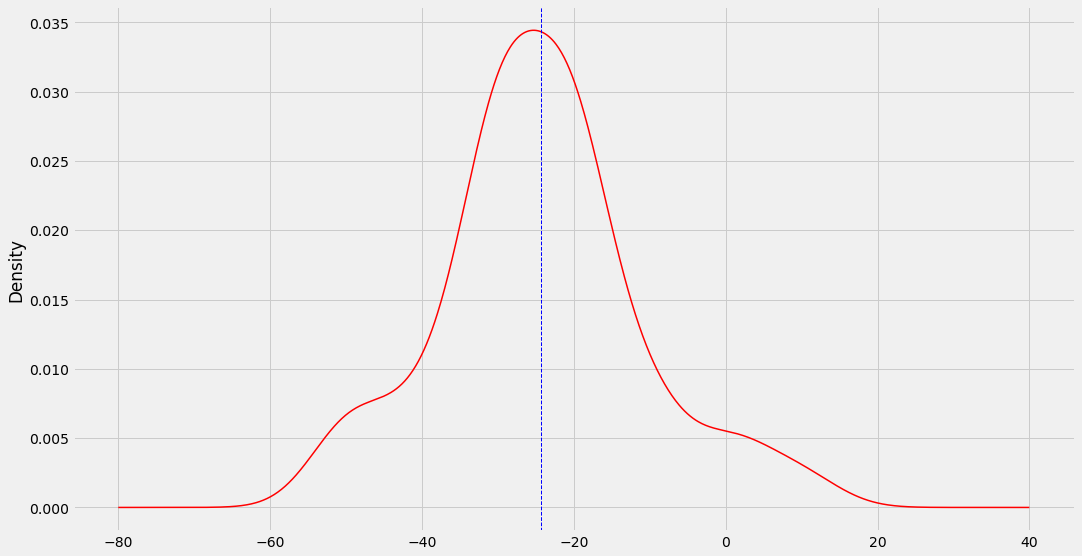

-24.34862385321101

In [46]:
j = 0
plt.figure(figsize=(16,9))
spec[wc[j]]['Liberism'].plot(kind='density', linewidth=1.5, color='r')
plt.axvline(spec[wc[j]]['Liberism'].mean(), c='b', linewidth=1, ls='--')
plt.show()
spec[wc[j]]['Liberism'].mean()

28.806451612903224


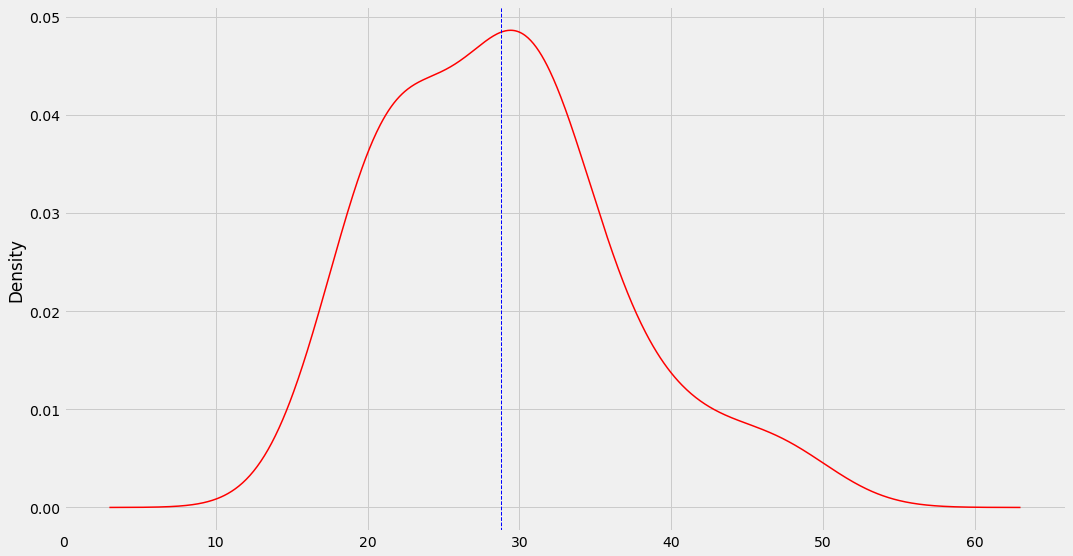

In [47]:
j = 2
print(spec[wc[j]]['Liberism'].mean())
plt.figure(figsize=(16,9))
spec[wc[j]]['Liberism'].plot(kind='density', linewidth=1.5, color='r')
plt.axvline(spec[wc[j]]['Liberism'].mean(), c='b', linewidth=1, ls='--')
plt.show()

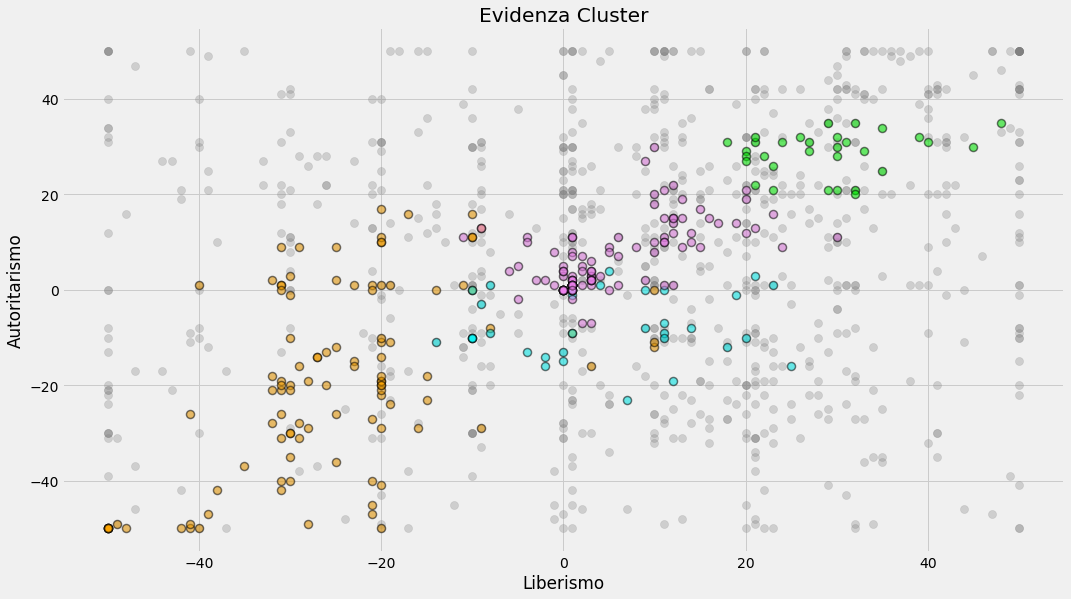

In [48]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Liberism, spec.Authoritarianism, c='grey', alpha=0.3, s=65)
plt.scatter(spec[wc[0]].Liberism, spec[wc[0]].Authoritarianism, facecolor='orange', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
# plt.scatter(spec[wc[1]].Liberism, spec[wc[1]].Authoritarianism, c='b', alpha=0.25)
plt.scatter(spec[wc[1]].Liberism, spec[wc[1]].Authoritarianism, facecolor='cyan', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
# plt.scatter(spec[wc[2]].Liberism, spec[wc[2]].Authoritarianism, c='black', s=65)
plt.scatter(spec[wc[2]].Liberism, spec[wc[2]].Authoritarianism, facecolor='lime', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
plt.scatter(spec[wc[3]].Liberism, spec[wc[3]].Authoritarianism, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
plt.xlabel('Liberismo')
plt.ylabel('Autoritarismo')
plt.title('Evidenza Cluster')
plt.show()

In [ ]:
??plt.scatter()

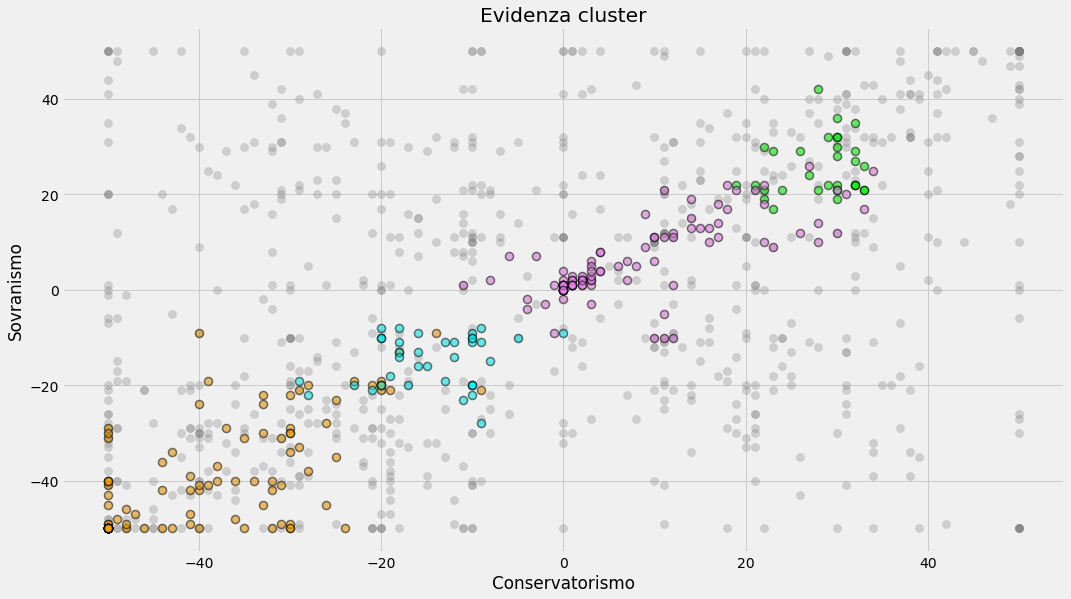

In [49]:
# j = 0
plt.figure(figsize=(16,9))
plt.scatter(spec.Conservatorism, spec.Sovranism, c='grey', alpha=0.3, s=65)
plt.scatter(spec[wc[0]].Conservatorism, spec[wc[0]].Sovranism, facecolor='orange', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
# plt.scatter(spec[wc[1]].Liberism, spec[wc[1]].Authoritarianism, c='b', alpha=0.25)
plt.scatter(spec[wc[1]].Conservatorism, spec[wc[1]].Sovranism, facecolor='cyan', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
# plt.scatter(spec[wc[2]].Liberism, spec[wc[2]].Authoritarianism, c='black', s=65)
plt.scatter(spec[wc[2]].Conservatorism, spec[wc[2]].Sovranism, facecolor='lime', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
plt.scatter(spec[wc[3]].Conservatorism, spec[wc[3]].Sovranism, facecolor='violet', s=65, alpha=0.5, 
            edgecolors='black', linewidth='1.5')
plt.xlabel('Conservatorismo')
plt.ylabel('Sovranismo')
plt.title('Evidenza cluster')
plt.show()

In [ ]:
j = 0
print(dfr[wc[j]].Q17.value_counts(normalize=True))
plt.figure(figsize=(16,9))
plt.barh(dfr[wc[j]].Q17.value_counts(normalize=True, ascending=True).index, 
         dfr[wc[j]].Q17.value_counts(normalize=True, ascending=True), alpha=0.7)
plt.grid(axis='y')
plt.show()

In [ ]:
j = 2
print(dfr[wc[j]].Q17.value_counts(normalize=True))
plt.figure(figsize=(16,9))
plt.barh(dfr[wc[j]].Q17.value_counts(normalize=True, ascending=True).index, 
         dfr[wc[j]].Q17.value_counts(normalize=True, ascending=True), alpha=0.7)
plt.grid(axis='y')
plt.show()

In [ ]:
dfr[wc[2]].shape

In [ ]:
j = 1
print(dfr[wc[j]].age.value_counts(normalize=True))
plt.figure(figsize=(16,9))
plt.barh(dfr[wc[j]].age.value_counts(normalize=True, ascending=True).index, 
         dfr[wc[j]].age.value_counts(normalize=True, ascending=True), alpha=0.7)
plt.grid(axis='y')
plt.show()

In [ ]:
dfr.columns

In [ ]:
j = 3
prio = dfr[wc[j]].Q20.str.join(sep='').str.get_dummies(sep=',')
prio.drop(' innovative', axis=1, inplace=True)
# print(round(prio.sum()/len(prio), 2))
plt.figure(figsize=(9,9))
plt.barh(prio.sum().sort_values(ascending=True).index, 
         prio.sum().sort_values(ascending=True)/len(prio), alpha=0.7)
plt.grid(axis='y')
plt.show()

In [ ]:
dfr[wc[j]].Q20

In [ ]:
dfr[wc[j]].Q20.str.join(sep='').str.get_dummies(sep=',')

In [ ]:
j=3
round(pd.get_dummies(dfr[wc[j]]['Q5']).sum().sort_values(ascending=False)/len(dfr[wc[j]]), 2)

In [ ]:
dfr['Q5']